# Game Text Extraction

*Data-Driven Innovation Challenge - Kaan G.*

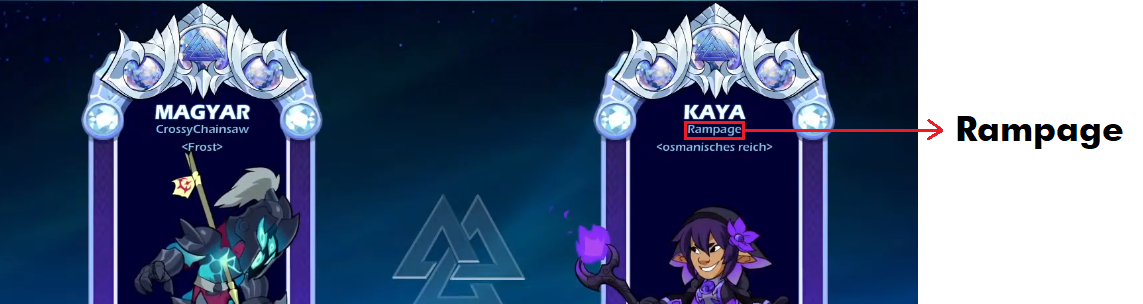

In [3]:
Image.open("./images/notebook-thumbnail-2.png")

# Chapters
- [Innovative idea](#innovative-idea)
- [Relevance](#relevance)
- [Feasability](#feasability)
- [Data collection](#data-collection)
- [Minimal Viable Product (MVP)](#minimal-viable-product-mvp)
- [Techniques](#techniques)
- [Approach](#approach)
- [Results](#results)

# Innovative idea
The idea is to build an application that can watch a video of ***Brawlhalla*** gameplay and extract the names of the players. By doing this I can link player names to certain (Brawlhalla Gameplay) videos. The benefit of linking player names to gameplay videos, is that players will have an easy time finding back their own matches. This could result in them watching back their matches and trying to analyse what they are doing right/wrong and make them improve over time. It can also help me for if I ever want to see how i have beaten player x before or lost to player y before.

***Brawlhalla**: A 1-on-1 fighting game.*

# Relevance
My project doesn't directly solve a big problem but it's more a quality of life application. Some people would like to watch back their matches for fun, some to improve, and some don't care at all. But in the end, it hasn't been done before which, for me, adds interest to the project. It also automizes a lengthy process which is fun to make in my opinion.

# Feasability
It is definitely feasible. Making use of already existing ***OCR-Technology***, I can extract the name of a player from an image. The only problem is that some characters will consistently be detected as other characters. But to solve this we simply have to retrain an existing OCR with our own data.

***OCR-Technology**: Optical Character Recognition, the technology to recognize characters from images.*

Here are some examples of the OCR-Accuracy directly from my notebook (PyTesseract Examples). You can see the accuracy by comparing the result to the expected resulted.

In [ ]:
expected_string = "CrossyChainsaw\n<Frost>"
image_file = "./data/player_name_data/crossychainsaw.png"
image = Image.open(image_file) # PIL.Image
ocr_result = pytesseract.image_to_string(image) # pytesseract is the OCR I'm using in this example
print("- Result -")
print(ocr_result)
print("- Expected -")
print(expected_string)

- Result -
CrossyChainsaw
<Frost>

- Expected -
CrossyChainsaw
<Frost>


In [ ]:
expected_string = "1v1 World Champion '20\nKurisu Makise <3\n<Kingdom Org>"
image_file = "./data/player_name_data/pavelski.png"
image = Image.open(image_file)  # PIL.Image
ocr_result = pytesseract.image_to_string(image) # pytesseract is the OCR I'm using in this example
print("- Result -")
print(ocr_result)
print("- Expected -")
print(expected_string)

- Result -
Iv1 World Champion “
Kurisu Makise <3
<Kingdom Org>

- Expected -
1v1 World Champion '20
Kurisu Makise <3
<Kingdom Org>


# Data Collection
To train the OCR on the game-font, I can simply generate the data myself. A player usually has a title, name, and clan. I train my model to recognize all 3 of them. A mistake I made is that the data I generate has some differences from the real data. My generated data is very sharp and noise-free. When we start normalizing images extracted from the game, we will start to see unsharp noisy text.

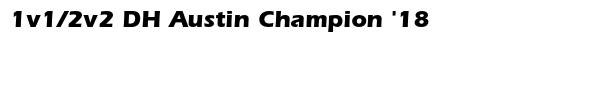

In [ ]:
Image.open('./attempt7/image_179.tif') # Player Title

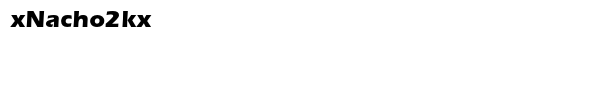

In [ ]:
Image.open('./attempt7/image_600.tif') # Player Name

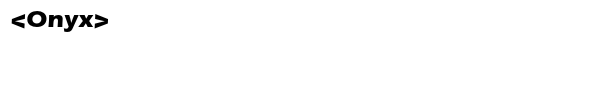

In [ ]:
Image.open('./attempt7/image_1.tif') # Clan Name

# Minimal Viable Product (MVP)
For my minimal viable product I want to have: *An application which can look at a gameplay-video and extract all the player names.*

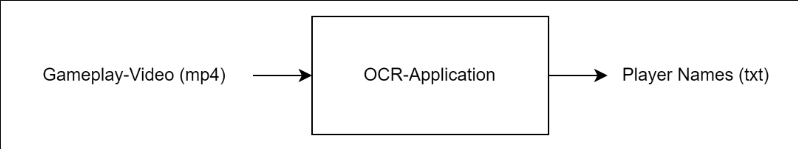

In [5]:
Image.open("./images/mvp-better.png")

If I manage to realise this goal I can start labelling gameplay-videos, and bind them to a search engine. Resulting in a search engine wherein you can easily find your own matches back.

(I go into more detail about the techniques in [Techniques](#techniques))

# Techniques
Until now I only mentioned the OCR in my application. But inside my application, OCR isn't the only technology I will use. Here a breakdown of what should happen in my MVP.

### Obtain Gameplay Videos
We need videos of gameplay. We can download these off of YouTube. Once we have a video we can feed it to the app.

### Filter Frames with Template Matching
a video of gameplay is usually around 30 minutes to 2 hours. In a video of 37 minutes, we are only interested in 9 specific different frames. To give an impression of what kind of frames I'm looking for, I'll show an example. Here are 4 different frames from one gameplay-video. From these 4 frames we are only interested in the upper-left frame. We can filter these frames out of the full length video using template matching with opencv.

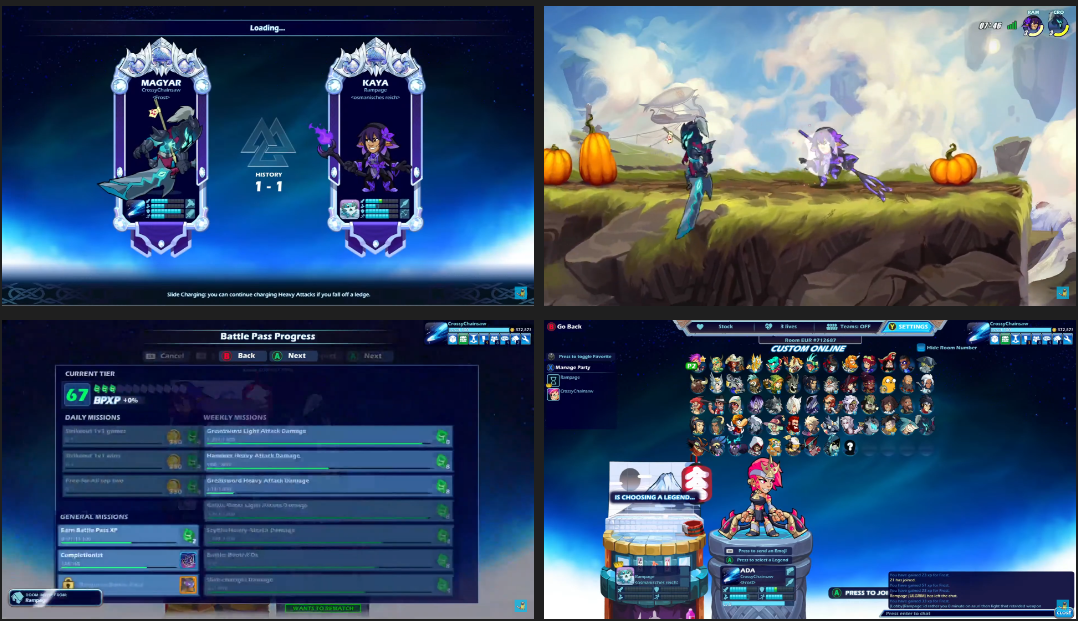

In [6]:
Image.open("./images/4-images.png")

Using OpenCV we can pull of a technique called "Template Matching". With this technique we can find a smaller image in a bigger image. If we make it try to find something that is always present in the desired frame, we can classify frames for being desired frames or not. Here is an example. On the left you see the frame the app is interested in, on the right you see our Template image. This means it will try to match my image into each frame of the video. and if it matches, we save the frame, and apply ocr on it later.

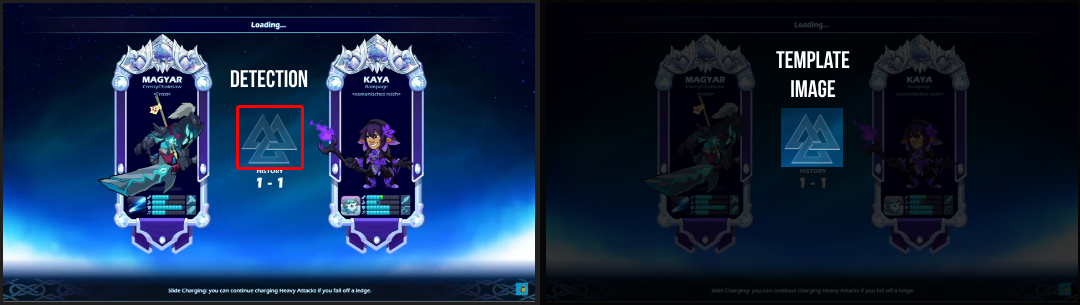

In [3]:
Image.open("./document_images/template-matching-example.png")

### Apply OCR on ROI
Once we have the desired frame, we can use the OCR on it. That would look something like this.

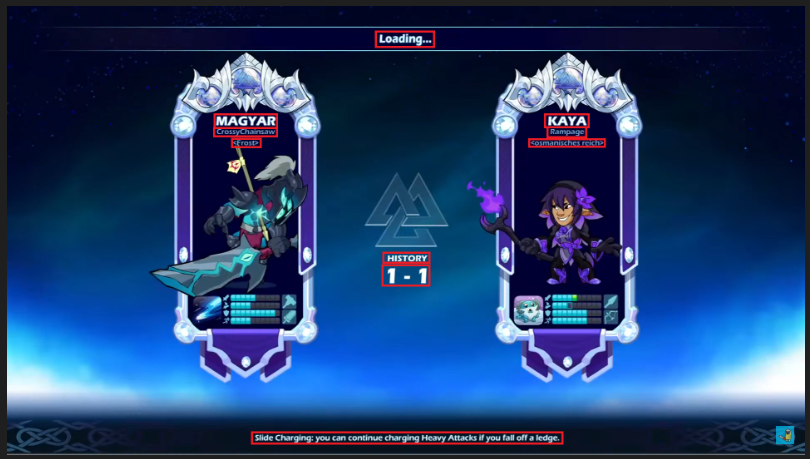

In [8]:
Image.open("./images/ocr-bounding-boxes.png")

This would output a ton of irrelevant information. The desired output in this case is "Rampage". To simplify it for the OCR we can lower the ROI (region of interest). We can simply do this by cropping the image. Then it would look something like this.

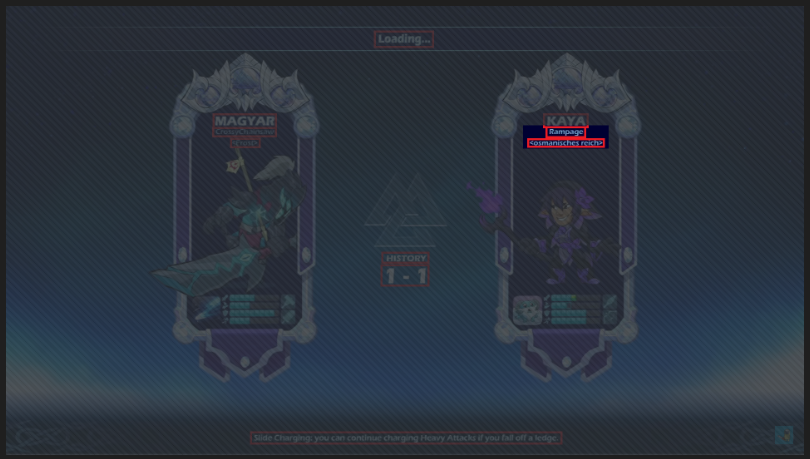

In [11]:
Image.open("./images/lower-roi-lower-width.png")

By lowering the ROI we lower the possible output to a maximum of 3 lines of text. We do face our first tricky problem. 

Here is an example player-name-area. In this case the name-area has:
- Title (1v1 World Champion '20)
- Name (Kurisu Makise &lt;3)
- Clan (&lt;Kingdom Org&gt;)

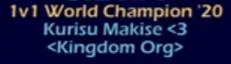

In [10]:
Image.open("./data/player_name_data/pavelski.png")

but it can also have:
- Title
- Name

and also:
- Name
- Clan

and even:
- Name

Because of this, the name isn't always shown on the same position, therefore we extract the title, name and clan and make the program figure out which text-line the name is. Once we have the names collected we can put them in a textfile and save it. Sounds doable right?

# Approach
So we have a few steps in the entire process. This is the order of the steps I'm taking.
- ✅ Obtain Gameplay Videos
-  ⏳ Train OCR 
- ✅ Lowering ROI
- ✅ Filter Frames with Template Matching

As you can see I skipped some steps. This is mainly because they require less effort / are less complex. And training the OCR is the main thing in the project. If that doesn't work, nothing will work. 

# Results
My MVP is done. Extracting the desired frames works perfectly. I can't really show that in the document, this will be shown in the presentation. I used 2 different OCR technologies. The accuracy of the OCRs is the only thing that is able to improve at this moment.
- [PyTesseract](#pytesseract)
- [EasyOCR](#easyocr)

### PyTesseract
On this approach I tried to train an PyTesseract OCR model, preprocess the data (turn all pixels either black or white), and tried the OCR out. Here are my results

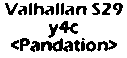

In [ ]:
# Preprocessing Data
threshold = 58
test_image = Image.open('./data/player_name_data/y4c.png')
grayscaled_test_image = test_image.convert('L')
grayscaled_test_image
black_and_white_image = grayscaled_test_image.point(
    lambda x: 255 if x < threshold else 0, '1')
black_and_white_image

In [ ]:
custom_tessdata_dir = r'C:\Users\kaan-\AppData\Local\Programs\Tesseract-OCR\tessdata'
custom_language_code = "train"

custom_text = pytesseract.image_to_string(
    black_and_white_image, config=f'--tessdata-dir "{custom_tessdata_dir}" -l {custom_language_code}')
old_result = pytesseract.image_to_string(black_and_white_image)
print("- First Result -")
print(old_result)
print("- Custom Model Result (Attempt 7) -")
print(custom_text)
print("- Expected -")
expected_string = "Valhallan S29\ny4c\n<Pandation>"
print(expected_string)

- First Result -
Vathallan S29
yt
<Pandation>

- Custom Model Result (Attempt 7) -
Vthallan S29
y4c
<Pandation>

- Expected -
Valhallan S29
y4c
<Pandation>


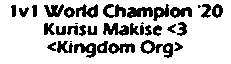

In [ ]:
threshold = 58
test_image = Image.open('./data/player_name_data/pavelski.png')
grayscaled_test_image = test_image.convert('L')
grayscaled_test_image
black_and_white_image = grayscaled_test_image.point(
    lambda x: 255 if x < threshold else 0, '1')
black_and_white_image

In [ ]:
custom_tessdata_dir = r'C:\Users\kaan-\AppData\Local\Programs\Tesseract-OCR\tessdata'
custom_language_code = "train"

custom_text = pytesseract.image_to_string(
    black_and_white_image, config=f'--tessdata-dir "{custom_tessdata_dir}" -l {custom_language_code}')
old_result = pytesseract.image_to_string(black_and_white_image)
print("- First Result -")
print(old_result)
print("- Custom Model Result (Attempt 7) -")
print(custom_text)
print("- Expected -")
expected_string = "1v1 World Champion '20\nKurisu Makise <3\n<Kingdom Org>"
print(expected_string)

- First Result -
1v1 Wortd Champion ‘20
Kurisu Makise <3
<Kingdom Org>

- Custom Model Result (Attempt 7) -
Ivl World Chzmplon '20
Kurisu Makise <3
<ngdom org>

- Expected -
1v1 World Champion '20
Kurisu Makise <3
<Kingdom Org>


PyTesseract is giving me decent results. the title and name aren't accuract but that is not our focus. I feel I might have a very steady model if I train the PyTesseract model with more data.

### EasyOCR
I didn't manage to retrain an EasyOCR model, so here are the results with the default model

In [ ]:
def extract_names_from_image(image_path):
    # Create an OCR reader
    # You can specify the language(s) you expect in the image
    reader = easyocr.Reader(['en'])

    # Perform OCR on the image
    results = reader.readtext(image_path)
    return results

def print_results(expected_string, img_path):
    extracted_names = extract_names_from_image(img_path)
    print()
    print("- Result -")
    for i in extracted_names:
        print(i[1])
    print()
    print("- Expected -")
    print(expected_string)
    print()
    print('--------------')

print_results("CrossyChainsaw\n<Frost>","./data/player_name_data/crossychainsaw.png")
print_results("Valhallan S29\ny4c\n<Pandation>","./data/player_name_data/y4c.png")
print_results("BCX Finalist '21\nTaher#FreePalestine\n<Ascenders of Asgard>","./data/player_name_data/taher.png")
print_results("1v1 World Champion '20\nKurisu Makise <3\n<Kingdom Org>","./data/player_name_data/pavelski.png")

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.



- Result -
CrossyChainsaw
<Frost>

- Expected -
CrossyChainsaw
<Frost>

--------------


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.



- Result -
Valhallan 529
y4c
<Pandation>

- Expected -
Valhallan S29
y4c
<Pandation>

--------------


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.



- Result -
BCX Finalist '21
Tahcr#FrccPalcstinc
KAsccndcrs of Asgard>

- Expected -
BCX Finalist '21
Taher#FreePalestine
<Ascenders of Asgard>

--------------

- Result -
Ivl World Champion 20
Kurisu Makisc <3
<Kingdom
Org?

- Expected -
1v1 World Champion '20
Kurisu Makise <3
<Kingdom Org>

--------------


EasyOCR is very consistent in the errors it makes. Every `e` gets recognized as `c`. Besides that it works pretty good.